In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("titanic-passengers.csv",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Collander, Mr. Erik Gustaf",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# convert column Embarked, str to int
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int64

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
# convert column Embarked, str to int
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      2
2      2
3      2
4      2
      ..
886    0
887    0
888    2
889    2
890    2
Name: Embarked, Length: 891, dtype: int64

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
sep1 = df['Name'].str.split(',',expand=True)
df[['Title','firstname','none']]=sep1[1].str.split('.',expand=True)
df.drop(["firstname","Name","none"], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,NaN,2,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,2,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,NaN,2,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,NaN,2,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,NaN,0,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,NaN,0,Mr
888,535,0,3,female,30.000000,0,0,315084,8.6625,NaN,2,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,NaN,2,Mr


In [16]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,NaN,2,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,F G73,2,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,NaN,2,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,NaN,2,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,2,Mr
5,105,0,3,male,37.000000,2,0,3101276,7.9250,NaN,2,Mr
6,576,0,3,male,19.000000,0,0,358585,14.5000,NaN,2,Mr
7,382,1,3,female,1.000000,0,2,2653,15.7417,NaN,0,Miss
8,228,0,3,male,20.500000,0,0,A/5 21173,7.2500,NaN,2,Mr
9,433,1,2,female,42.000000,1,0,SC/AH 3085,26.0000,NaN,2,Mrs


In [17]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
74.000000      1
36.500000      1
34.500000      1
55.500000      1
23.500000      1
Name: Age, Length: 89, dtype: int64

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
x=len(df.loc[df['Age']<18])
x

113

In [21]:
y=len(df.loc[(df['Age']<18)&(df['Survived']==1)&(df["Sex"]=="female")])
y

38

In [22]:
z=len(df.loc[(df['Age']<18)&(df['Survived']==1)&(df["Sex"]=="male")])
z

23

In [23]:
A=x-(y+z)
A # all peaple not Survived	(male or female)

52

In [24]:
X=len(df.loc[(df['Age']>18)&(df['Age']<50)])
X

678

In [25]:
Y=len(df.loc[(df['Age']>18)&(df['Age']<50)&(df['Survived']==1)&(df["Sex"]=="male")])
Y

78

In [26]:
Z=len(df.loc[(df['Age']>18)&(df['Age']<50)&(df['Survived']==1)&(df["Sex"]=="female")])
Z

167

In [27]:
B=X-(Y+Z)
B  # all peaple not Survived	(male or female) & 18<Age<50

433

In [28]:
len(df.loc[df['Survived']==1])

342

In [29]:
len(df.loc[df['Survived']==0])

549

In [32]:
new_df=df.drop(labels=['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis=1)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,2,male,28.000000,0,0,13.0000,Mr
1,0,3,male,25.000000,0,0,7.6500,Mr
2,0,3,male,20.000000,0,0,7.8542,Mr
3,0,3,female,29.000000,0,4,21.0750,Mrs
4,0,1,male,31.000000,1,0,52.0000,Mr
...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,Mrs
887,0,3,male,22.000000,0,0,7.2292,Mr
888,0,3,female,30.000000,0,0,8.6625,Miss
889,0,3,male,29.699118,0,0,7.8958,Mr


In [36]:
def plot_correlation_map( new_df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 21 , 21 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

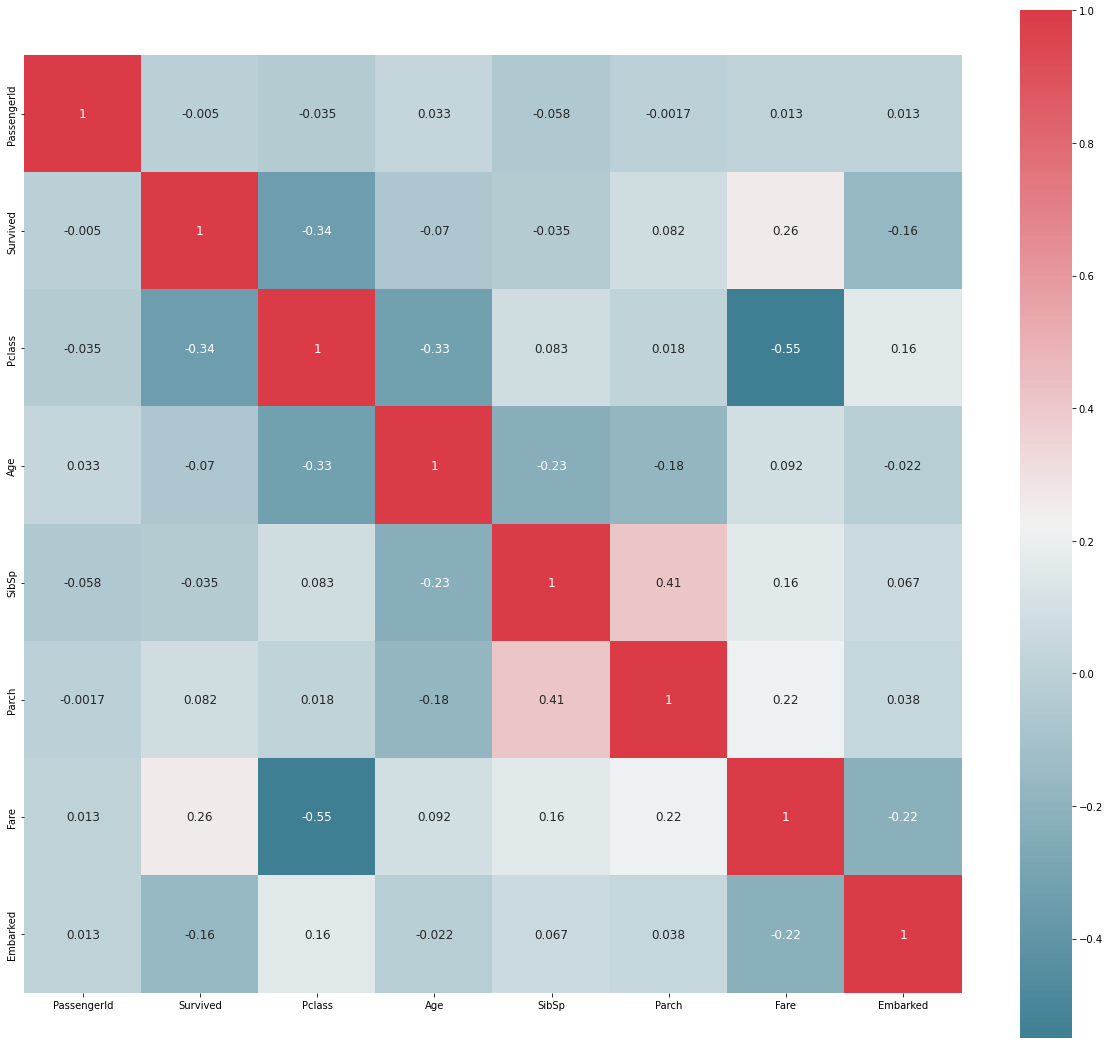

In [37]:
plot_correlation_map(new_df)

In [43]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
#features extraction
x = new_df[['Pclass', 'Fare','Age']]
y = new_df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print('f1_score:', f1_score(y_test, y_pred ))
print( 'precision_score',precision_score(y_test, y_pred ))
print( 'recall_score',recall_score(y_test, y_pred ))
print( 'mean_squared_error', mean_squared_error(y_test, y_pred))
print('confusion_matrix\n', confusion_matrix(y_test, y_pred ))

Accuracy=0.70
f1_score: 0.5072463768115942
precision_score 0.5932203389830508
recall_score 0.4430379746835443
mean_squared_error 0.30493273542600896
confusion_matrix
 [[120  24]
 [ 44  35]]


The Result of Confusion Matrix :-
In case 1, actual value was positive and the model predicted a positive value(TP) = 120.
In case 2 : actual value was negative but the model predicted a positive value(FP) = 24.
In case 3 : actual value was positive and the model predicted a negative value (FN) = 44.
In case 4 : actual value was negative and the model predicted a negative value (TN) = 35.